In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud


# 1. Load data

In [2]:
df = pd.read_parquet('../data/processed/merged.parquet')
df.head()

,text,label,source_ds
0,"<USER> <URL> - Awww, that's a bummer. You shou...",0,ds1.csv
1,is upset that he can't update his Facebook by ...,0,ds1.csv
2,<USER> I dived many times for the ball. Manage...,0,ds1.csv
3,my whole body feels itchy and like its on fire,0,ds1.csv
4,"<USER> no, it's not behaving at all. i'm mad. ...",0,ds1.csv


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738364 entries, 0 to 1738363
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   text       object
 1   label      int64 
 2   source_ds  object
dtypes: int64(1), object(2)
memory usage: 39.8+ MB


### 1.2. Check for missing values

In [4]:
df.isnull().sum()


text         0
label        0
source_ds    0
dtype: int64

### 1.3. Class distribution


In [5]:
df['label'].value_counts()


label
2    852380
0    820855
1     65129
Name: count, dtype: int64

###  1.4. Plot class distribution

/tmp/ipykernel_57714/2675754253.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipykernel_57714/2675754253.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['negative', 'neutral', 'positive'])


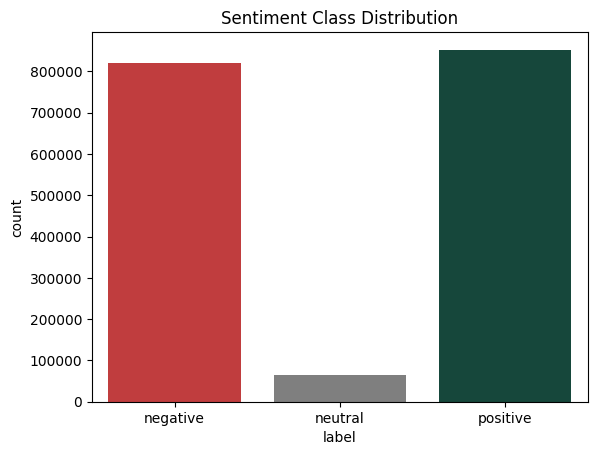

In [6]:
ax = sns.countplot(
    x='label',
    data=df,
    palette=["#d62728", "#7f7f7f", "#0e4f3f"]  # negative, neutral, positive
)
ax.set_xticklabels(['negative', 'neutral', 'positive'])
plt.title("Sentiment Class Distribution")
plt.savefig('figures/sentiment_class_distribution.png')
plt.show()


### 1.5. Tweet length distribution

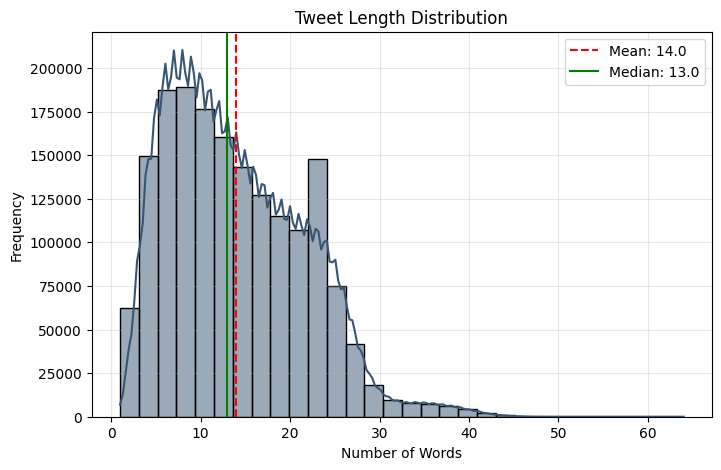

In [7]:
# Tweet length distribution
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(
    df['text_length'],
    bins=30,
    kde=True,              # adds smooth density curve
    color="#375674",       # custom color
    edgecolor="black"
)

plt.axvline(df['text_length'].mean(), color='red', linestyle='--', label=f"Mean: {df['text_length'].mean():.1f}")
plt.axvline(df['text_length'].median(), color='green', linestyle='-', label=f"Median: {df['text_length'].median():.1f}")

plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('figures/tweet_length_distribution.png')
plt.show()

### 1.6. Duplicate or Near-Duplicate Tweets

In [8]:
"Duplicate tweets:", df.duplicated(subset='text').sum()


('Duplicate tweets:', 7859)

### 1.7. Tweet Length by Sentiment

/tmp/ipykernel_57714/2393200890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


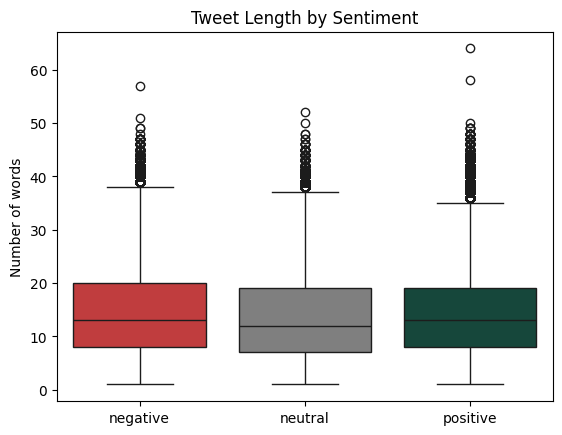

In [9]:
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))
label_names = {0: 'negative', 1: 'neutral', 2: 'positive'}
df['sentiment_name'] = df['label'].map(label_names)

ax = sns.boxplot(
    x='sentiment_name', y='text_len', data=df,
    order=['negative', 'neutral', 'positive'],
    palette=['#d62728', '#7f7f7f', '#0e4f3f']
)
ax.set_xlabel('')
ax.set_ylabel('Number of words')
plt.title('Tweet Length by Sentiment')
plt.savefig('figures/tweet_length_by_sentiment.png')
plt.show()

### 1.8 Contribution between Datasets

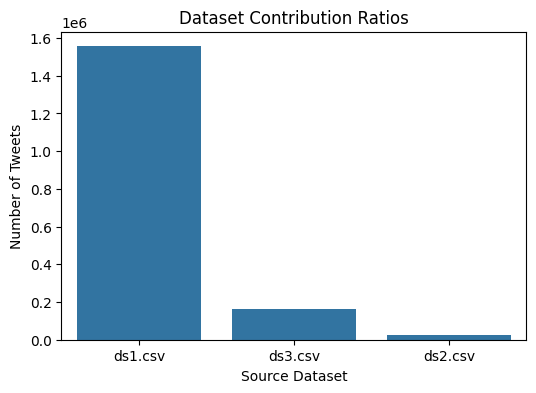

source_ds
ds1.csv    89.475737
ds3.csv     9.221371
ds2.csv     1.302892
Name: count, dtype: float64

In [10]:
counts = df['source_ds'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.title("Dataset Contribution Ratios")
plt.ylabel("Number of Tweets")
plt.xlabel("Source Dataset")
plt.savefig('figures/dataset_contribution_ratios.png')
plt.show()

counts / counts.sum() * 100

In [11]:
label_map = {0: "negative", 1: "neutral", 2: "positive"}

for label_id, label_name in label_map.items():
    print(f"\n--- {label_name.upper()} EXAMPLES ---")
    sample_texts = df[df['label'] == label_id]['text'].sample(5, random_state=42)
    for t in sample_texts:
        print("-", t[:200])  # show up to 200 chars



--- NEGATIVE EXAMPLES ---
- <USER> oh that sux youu should get lotsa funny for ur bday =D altho that may be a bit late, so make everyone give it to u early!
- yeah... i need to do more cardio... i hate cardio
- B-Day shopping for my mother. She wants an iPod touch 8GB, but I'm getting her the 16GB. Poor lady was suffering with a Zune
- <USER> thats illegal :o im disappointed..
- <USER> lmao I have a 8:00 class where are u living??

--- NEUTRAL EXAMPLES ---
- waiting waiting waiting waiting waiting waiting waiting waiting waiting mai chowkidar huuuuu jai modi
- _carter The video is `private I cant see it
- modi addressed the nation about achievements isro drdo but unwittingly gave credits jawaharlal nehru nehrus belief science fuelled indias audacious space programme
- life is funny and ironic at the same time isn`****?
- couldn`t resist ? <URL>

--- POSITIVE EXAMPLES ---
- <USER> Me neither.. But they are getting a lot of page hits, as we all refresh #opera
- <USER> Me too! It can't b